### K Means
- This is the first classification algorithm that I'm going to use.
- It is an unsupervised learning model, meaning that it groups clusters without being given the labels for data.
- This is done by taking $k$ points and changing the points such that they are each at the center of a cluster.
- The value of $k$ should be the same as the number of labels that you have. This may or may not be difficult depending on the dataset you have.
- This is a very efficient algorithm, as you only need to keep track of the $k$ means. Features are classified based on which mean they are closest to.
- Algorithm steps
    1. Assign $k$ random centroids
    2. Classify all points based on the centroid they are closest to (usually using Euclidian distance)
    3. Move centroids to the mean of each cluster
    4. Repeat 2 and 3 until centroids stabilize
- Pros
    - Simple
    - Efficient
    - Unsupervised
- Cons
    - Sensitive to outliers
    - Good results require somewhat equally sized and relatively round-shaped clusters
    - The value of $k$ must be set
    - The optimal cluster centroids might not be found

In [1]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np

import datasets.clusters

### Imports
- `sklearn.cluster` is the library used for clustering algorithms from scikit learn
- `matplotlib.pyplot` is the library used for plotting
- `numpy` is used for some computations
- `datasets.clusters` is the library I built to generate classification datasets

In [ ]:
dataset_1, _ = datasets.clusters.gen_data([[10, 10], [25, 25]], 50, 1, 10, 0)
dataset_1_var, _ = datasets.clusters.gen_data([[10, 10], [25, 25]], 50, 1, 10, 0.3)

dataset_2, _ = datasets.clusters.gen_data([[10, 10], [-10, 10], [-10, -10], [10, -10]], 30, 1, 10, 0)
dataset_2_var, _ = datasets.clusters.gen_data([[10, 10], [-10, 10], [-10, -10], [10, -10]], 30, 1, 10, 0.3)

dataset_3, _ = datasets.clusters.gen_data([[3, 3], [-3, 3], [-3, -3], [3, -3]], 30, 1, 10, 0)
dataset_3_var, _ = datasets.clusters.gen_data([[3, 3], [-3, 3], [-3, -3], [3, -3]], 30, 1, 10, 0.3)

dataset_4, _ = datasets.clusters.gen_data([[1, 1], [2, 3], [-1, 2], [3, -2]], 30, 1, 3, 0)
dataset_4_var, _ = datasets.clusters.gen_data([[1, 1], [2, 3], [-1, 2], [3, -2]], 30, 1, 3, 0.3)

### Datasets
- Each dataset has a version with and without variance. Variance essentially allows for outliers.
- For each dataset:
    - `dataset_1` has two clusters that are very separate
    - `dataset_2` has four clusters that don't overlap at all
    - `dataset_3` has four clusters that are close to one another
    - `dataset_4` has four clusters that greatly overlap

In [3]:
def train_and_plot(model: KMeans, k: int, dataset: np.ndarray) -> None:
    model.fit(dataset)

    labels_arr = model.predict(dataset)
    clusters = [[] for i in range(k)]
    for i in range(len(dataset)):
        clusters[labels_arr[i]].append(dataset[i])

    colors = ['red', 'green', 'blue', 'purple', 'orange', 'pink', 'brown']
    ax = plt.gca()

    lim1 = abs(np.max(dataset))+10
    lim2 = abs(np.min(dataset))+10
    if (lim1 > lim2):
        ax.set_xlim(-lim1, lim1)
        ax.set_ylim(-lim1, lim1)
    else:
        ax.set_xlim(-lim2, lim2)
        ax.set_ylim(-lim2, lim2)

    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    
    for i in range(len(clusters)):
        xdata = []
        ydata = []

        for d in clusters[i]:
            xdata.append(d[0])
            ydata.append(d[1])

        ax.scatter(xdata, ydata, c=colors[i])

    ax.legend([f"Cluster {i+1}" for i in range(k)])
    
    plt.show()

### Training
- All we need to do is fit the data and then organize it by label.
- After this is done, each label (cluster) is plotted in a different color.

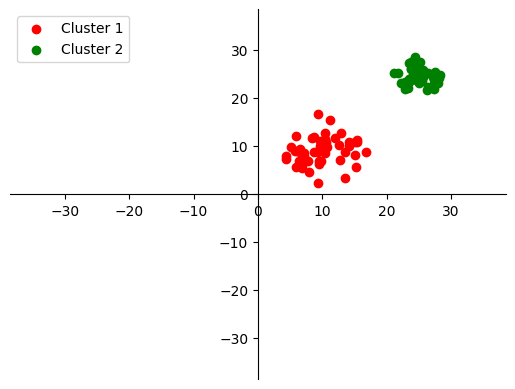

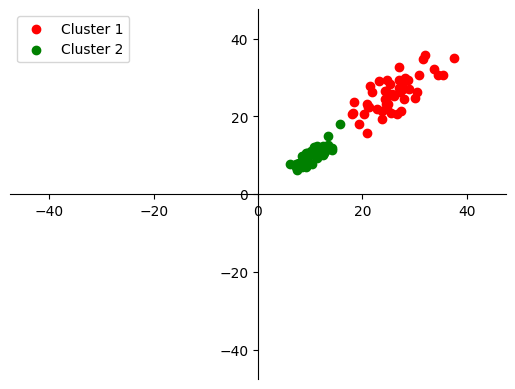

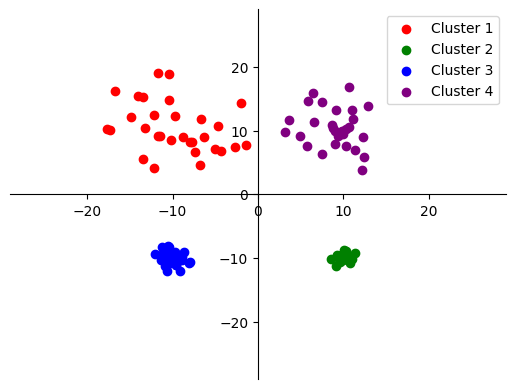

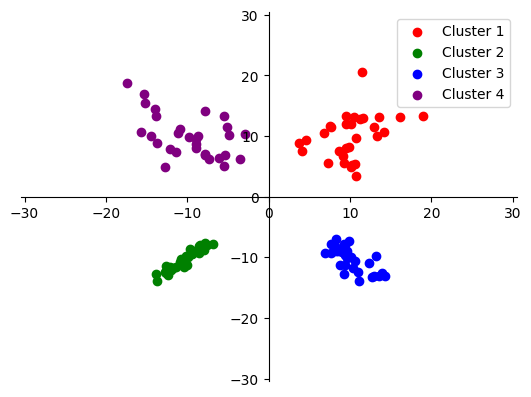

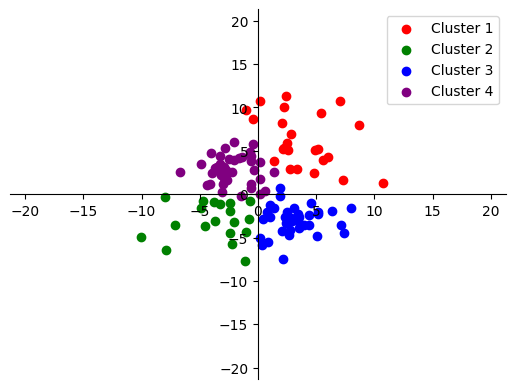

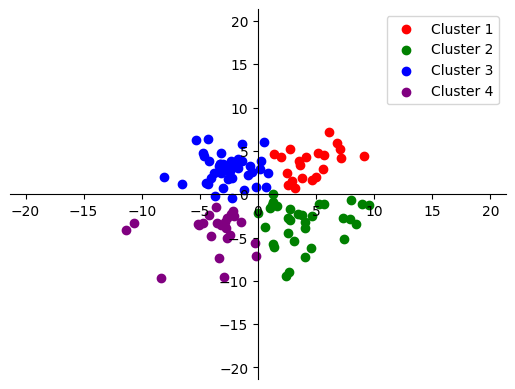

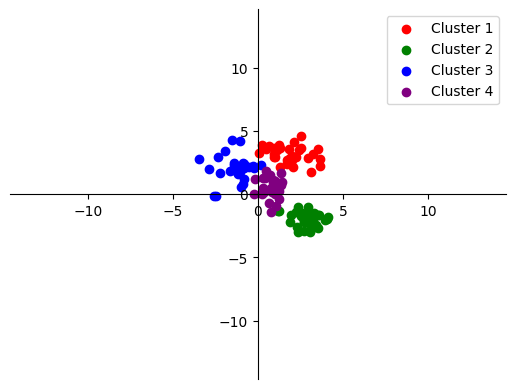

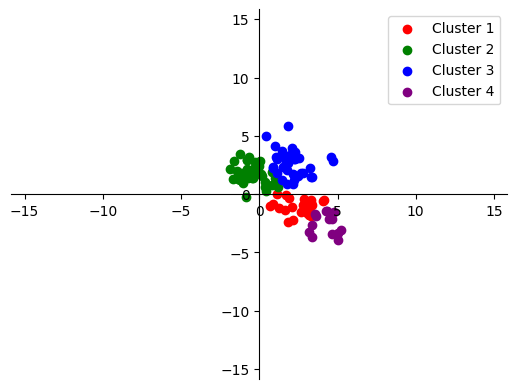

In [4]:
train_and_plot(KMeans(n_clusters=2), 2, dataset_1)
train_and_plot(KMeans(n_clusters=2), 2, dataset_1_var)

train_and_plot(KMeans(n_clusters=4), 4, dataset_2)
train_and_plot(KMeans(n_clusters=4), 4, dataset_2_var)

train_and_plot(KMeans(n_clusters=4), 4, dataset_3)
train_and_plot(KMeans(n_clusters=4), 4, dataset_3_var)

train_and_plot(KMeans(n_clusters=4), 4, dataset_4)
train_and_plot(KMeans(n_clusters=4), 4, dataset_4_var)

### Results
- The results for this seem pretty standard.
- As data starts to get close together some issues start to arise, this can be gathered by the fact that some clusters have noticably more points than others.
- Borders also start to get strange. Dataset 4 works as a good example of what happens when the value for $k$ doesn't quite match the data. The overlapping clusters essentially form what should be $k=2$, yet $k=4$ is chosen and results in somewhat arbitrary clusters.
- Dataset 3, even without variance, appears to have sub-optimal cluster centroids, as certain points should clearly be in different clusters.